In [66]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
BASE_DIR = '../../data/rawdata/'

In [ ]:
def check_correct(row):
    if row['big_small'] == 'S' and row['opt'] == 4:
        return True
    elif row['big_small'] == 'B' and row['opt'] == 3:
        return True
    return False

def read_bh(file):
    '''Auxiliary function to read the data from the behavioural file
    in the specified format and with meaningful column names.'''
    df = pd.read_csv(file, header=None,
        names=['o', 'ab', 'show_times', 'stim', 'PER', 'big_small', 'nl', 'onset', 'opt', 'response_time']).drop(
        columns=['o', 'PER']
    )
    df['opt'] = df['opt'].astype('Int64')

    df['correct'] = df[df['opt'].notna()].apply(check_correct, axis=1)
    return df

def add_consecutive(df):
    df['sequence'] = df.sort_values(by='onset').groupby('stim').cumcount() + 1
    return df

def get_trials_condition(df):
    '''Auxiliary function to get the number of trials and unique stimuli
    in the dataset, as well as the number of trials for each condition.'''
    dummy = df[(df['opt'].isna()) | (df['correct'] == False)]
    p11 = df[(df['show_times'] == 1) & (df['correct'] == True)]
    p31 = df[(df['show_times'] == 3) & (df['correct'] == True) & (df['sequence'] == 1)]
    p32 = df[(df['show_times'] == 3) & (df['correct'] == True) & (df['sequence'] == 2)]
    p33 = df[(df['show_times'] == 3) & (df['correct'] == True) & (df['sequence'] == 3)]

    print('Number of trials:', len(df))
    print('Number of unique stimuli:', len(df['stim'].unique()))
    print('------')
    print(f'                Number of 1-show trials: {len(p11)}')
    print(f'Number of 3-show trials with sequence 1: {len(p31)}')
    print(f'Number of 3-show trials with sequence 2: {len(p32)}')
    print(f'Number of 3-show trials with sequence 3: {len(p33)}')
    print(f'                 Number of dummy trials: {len(dummy)}')
    
    return {
        'p11': p11,
        'p31': p31,
        'p32': p32,
        'p33': p33,
        'dummy': dummy
    }

In [17]:
def get_ps_from_file(file):
    '''Auxiliary function to read the data from the behavioural file
    and add the sequence column to it.'''
    print('*'*50)
    print(f'Processing file {file}')
    df = read_bh(file)
    df = add_consecutive(df)
    return get_trials_condition(df)

In [18]:
# Get all subjects' directories
base_path = Path(BASE_DIR)
subjects = sorted([d for d in base_path.iterdir() if d.is_dir()])
data = {}

# Load all behaviour files
for subject in subjects:
    # Behaviour files are CSVs in the beh directory
    beh_files = sorted(subject.glob('beh/*.csv'))
    csvs = {}
    # Each subject should have 2 behaviour files
    if len(beh_files) != 2:
        print(f'Error: {subject.name} does not have 2 behaviour files')
        continue
    # Load the CSVs with pandas.read_csv
    csvs['rep1'] = get_ps_from_file(beh_files[0])
    csvs['rep2'] = get_ps_from_file(beh_files[1])
    data[subject.name] = csvs

**************************************************
Processing file ../../data/rawdata/o01/beh/o01-1.csv
Number of trials: 48
Number of unique stimuli: 24
------
                Number of 1-show trials: 10
Number of 3-show trials with sequence 1: 7
Number of 3-show trials with sequence 2: 7
Number of 3-show trials with sequence 3: 10
                 Number of dummy trials: 14
**************************************************
Processing file ../../data/rawdata/o01/beh/o01-2.csv
Number of trials: 48
Number of unique stimuli: 24
------
                Number of 1-show trials: 10
Number of 3-show trials with sequence 1: 10
Number of 3-show trials with sequence 2: 9
Number of 3-show trials with sequence 3: 9
                 Number of dummy trials: 10
**************************************************
Processing file ../../data/rawdata/o02/beh/o02-1.csv
Number of trials: 48
Number of unique stimuli: 24
------
                Number of 1-show trials: 11
Number of 3-show trials with sequence

In [19]:
print(data.keys())

dict_keys(['o01', 'o02', 'o03', 'o04', 'o05', 'o06', 'o07', 'o08', 'o09', 'o10', 'o11', 'o12', 'o13', 'o14', 'o15', 'o16', 'o17', 'o18', 'y01', 'y02', 'y03', 'y04', 'y05', 'y06', 'y07', 'y08', 'y09', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19'])


In [20]:
data['y01']['rep1']

{'p11':    ab  show_times                   stim big_small  nl   onset  opt  \
 2   D           1    stim/flashlight.bmp         S  NL   35988    4   
 11  D           1  stim/sequoia_tree.bmp         B   L   82988    3   
 15  D           1        stim/basket.bmp         B  NL   98988    3   
 21  D           1       stim/blender.bmp         B  NL  116988    3   
 28  D           1          stim/bear.bmp         B   L  141988    3   
 31  D           1     stim/saxophone.bmp         B  NL  166988    3   
 33  D           1          stim/dove.bmp         S   L  188988    4   
 34  D           1          stim/yarn.bmp         S  NL  199988    4   
 36  D           1       stim/grappes.bmp         S   L  221988    4   
 37  D           1     stim/raspberry.bmp         S   L  224988    4   
 39  D           1           stim/dog.bmp         B   L  230989    3   
 47  D           1        stim/camera.bmp         S  NL  262988    4   
 
     response_time  correct  sequence  
 2             

In [39]:
data['y01']['rep1']['dummy']

,ab,show_times,stim,big_small,nl,onset,opt,response_time,correct,sequence
5,A,3,stim/penguin.bmp,B,L,44988,4,811,False,1
12,A,3,stim/envelope.bmp,S,NL,89988,3,860,False,1
27,A,3,stim/toilett.bmp,B,NL,134988,4,590,False,2


## Analysis intra-rep

In [52]:
rep_stats_df = pd.DataFrame(columns=[
    'subject',
    'rep',
    'p31',
    'p32',
    'p33',
    'p31_mean_rt',
    'p32_mean_rt',
    'p33_mean_rt',
    'p31_std_rt',
    'p32_std_rt',
    'p33_std_rt',
    'dummy_p3_',
    'mean_rt',
    'std_rt',
    'mean_acc',
    'std_acc'
    ])

In [53]:
for subject in data.keys():
    new_rows = []
    new_rows.append({
        'subject': subject,
        'rep': 'rep1',
        'p31': len(data[subject]['rep1']['p31']),
        'p32': len(data[subject]['rep1']['p32']),
        'p33': len(data[subject]['rep1']['p33']),
        'p31_mean_rt': data[subject]['rep1']['p31']['response_time'].mean(),
        'p32_mean_rt': data[subject]['rep1']['p32']['response_time'].mean(),
        'p33_mean_rt': data[subject]['rep1']['p33']['response_time'].mean(),
        'p31_std_rt': data[subject]['rep1']['p31']['response_time'].std(),
        'p32_std_rt': data[subject]['rep1']['p32']['response_time'].std(),
        'p33_std_rt': data[subject]['rep1']['p33']['response_time'].std(),
        'dummy_p3_': len(data[subject]['rep1']['dummy'][data[subject]['rep1']['dummy']['show_times'] == 3]),
        'mean_acc': 0,
        'std_acc': 0
    })
    new_rows.append({
        'subject': subject,
        'rep': 'rep2',
        'p31': len(data[subject]['rep2']['p31']),
        'p32': len(data[subject]['rep2']['p32']),
        'p33': len(data[subject]['rep2']['p33']),
        'p31_mean_rt': data[subject]['rep2']['p31']['response_time'].mean(),
        'p32_mean_rt': data[subject]['rep2']['p32']['response_time'].mean(),
        'p33_mean_rt': data[subject]['rep2']['p33']['response_time'].mean(),
        'p31_std_rt': data[subject]['rep2']['p31']['response_time'].std(),
        'p32_std_rt': data[subject]['rep2']['p32']['response_time'].std(),
        'p33_std_rt': data[subject]['rep2']['p33']['response_time'].std(),
        'dummy_p3_': len(data[subject]['rep2']['dummy'][data[subject]['rep2']['dummy']['show_times'] == 3]),
        'mean_rt': data[subject]['rep2']['p31']['response_time'].mean(),
        'std_rt': data[subject]['rep2']['p31']['response_time'].std(),
        'mean_acc': 0,
        'std_acc': 0
    })

    rep_stats_df = pd.concat([rep_stats_df, pd.DataFrame(new_rows)])

/tmp/ipykernel_33794/1827422936.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rep_stats_df = pd.concat([rep_stats_df, pd.DataFrame(new_rows)])


In [54]:
rep_stats_df

,subject,rep,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc
0,o01,rep1,7,7,10,920.571429,803.285714,860.800000,140.580768,153.969385,158.489257,12,NaN,NaN,0,0
1,o01,rep2,10,9,9,965.500000,838.666667,789.444444,207.437943,164.601033,159.204359,8,965.500000,207.437943,0,0
0,o02,rep1,12,12,12,891.000000,644.750000,666.666667,137.895876,112.039867,98.721218,0,NaN,NaN,0,0
1,o02,rep2,12,12,12,807.500000,648.500000,711.333333,150.318752,87.060585,96.502787,0,807.500000,150.318752,0,0
0,o03,rep1,12,12,12,775.583333,667.000000,722.000000,182.404375,111.949664,107.331263,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,y17,rep2,10,12,12,721.400000,665.833333,635.916667,133.544999,103.270900,74.456160,2,721.400000,133.544999,0,0
0,y18,rep1,11,10,11,777.454545,660.600000,738.727273,198.030989,85.381757,168.161286,4,NaN,NaN,0,0
1,y18,rep2,12,12,11,765.833333,637.166667,667.272727,114.015018,102.322870,132.324670,1,765.833333,114.015018,0,0
0,y19,rep1,11,11,11,852.545455,664.272727,663.000000,196.760953,90.145539,72.908161,3,NaN,NaN,0,0


In [60]:
subject_stats_df = rep_stats_df.sort_values(by='rep').groupby('subject').agg({
    'p31': 'sum',
    'p32': 'sum',
    'p33': 'sum',
    'p31_mean_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p32_mean_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p33_mean_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p31_std_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p32_std_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p33_std_rt': lambda x: x.iloc[1] - x.iloc[0],
    'dummy_p3_': 'sum',
    'mean_rt': lambda x: x.iloc[0] - x.iloc[1],
    'std_rt': lambda x: x.iloc[0] - x.iloc[1],
    'mean_acc': lambda x: x.iloc[0] - x.iloc[1],
    'std_acc': lambda x: x.iloc[0] - x.iloc[1]
}).reset_index()

subject_stats_df

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc
0,o01,17,16,19,44.928571,35.380952,-71.355556,66.857174,10.631648,0.715102,20,NaN,NaN,0,0
1,o02,24,24,24,-83.500000,3.750000,44.666667,12.422876,-24.979282,-2.218431,0,NaN,NaN,0,0
2,o03,23,21,23,-22.128788,129.666667,-14.727273,-77.949252,128.349108,54.174211,5,NaN,NaN,0,0
3,o04,22,21,21,122.583333,-71.590909,-136.583333,189.576505,-227.592514,-323.110670,8,NaN,NaN,0,0
4,o05,17,20,22,-277.028571,127.202020,85.466667,-117.148330,36.862880,99.212789,13,NaN,NaN,0,0
5,o06,23,22,22,-93.666667,-70.233333,-61.181818,0.066228,-115.386423,-91.418164,5,NaN,NaN,0,0
6,o07,23,23,23,43.696970,-10.825758,-103.303030,45.579125,-36.833276,-54.505093,3,NaN,NaN,0,0
7,o08,23,22,23,33.348485,-7.616667,157.939394,247.953389,-106.707190,149.532472,4,NaN,NaN,0,0
8,o09,17,21,22,-73.060606,-127.427273,-26.454545,-83.113914,-430.750151,-11.536060,12,NaN,NaN,0,0
9,o10,22,23,23,53.666667,75.681818,-11.742424,-46.793786,189.711035,-133.400158,4,NaN,NaN,0,0


In [76]:
subject_stats_df['p33_p31_diff'] = subject_stats_df['p33_mean_rt'] - subject_stats_df['p31_mean_rt']
subject_stats_df['p32_p31_diff'] = subject_stats_df['p32_mean_rt'] - subject_stats_df['p31_mean_rt']
subject_stats_df['p33_p32_diff'] = subject_stats_df['p33_mean_rt'] - subject_stats_df['p32_mean_rt']

subject_stats_df

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc,p33_p31_diff,p32_p31_diff,p33_p32_diff
0,o01,17,16,19,44.928571,35.380952,-71.355556,66.857174,10.631648,0.715102,20,NaN,NaN,0,0,-116.284127,-9.547619,-106.736508
1,o02,24,24,24,-83.500000,3.750000,44.666667,12.422876,-24.979282,-2.218431,0,NaN,NaN,0,0,128.166667,87.250000,40.916667
2,o03,23,21,23,-22.128788,129.666667,-14.727273,-77.949252,128.349108,54.174211,5,NaN,NaN,0,0,7.401515,151.795455,-144.393939
3,o04,22,21,21,122.583333,-71.590909,-136.583333,189.576505,-227.592514,-323.110670,8,NaN,NaN,0,0,-259.166667,-194.174242,-64.992424
4,o05,17,20,22,-277.028571,127.202020,85.466667,-117.148330,36.862880,99.212789,13,NaN,NaN,0,0,362.495238,404.230592,-41.735354
5,o06,23,22,22,-93.666667,-70.233333,-61.181818,0.066228,-115.386423,-91.418164,5,NaN,NaN,0,0,32.484848,23.433333,9.051515
6,o07,23,23,23,43.696970,-10.825758,-103.303030,45.579125,-36.833276,-54.505093,3,NaN,NaN,0,0,-147.000000,-54.522727,-92.477273
7,o08,23,22,23,33.348485,-7.616667,157.939394,247.953389,-106.707190,149.532472,4,NaN,NaN,0,0,124.590909,-40.965152,165.556061
8,o09,17,21,22,-73.060606,-127.427273,-26.454545,-83.113914,-430.750151,-11.536060,12,NaN,NaN,0,0,46.606061,-54.366667,100.972727
9,o10,22,23,23,53.666667,75.681818,-11.742424,-46.793786,189.711035,-133.400158,4,NaN,NaN,0,0,-65.409091,22.015152,-87.424242


In [77]:
youngs = subject_stats_df[subject_stats_df['subject'].str.startswith('y')]
youngs

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc,p33_p31_diff,p32_p31_diff,p33_p32_diff
18,y01,22,23,24,-55.900000,-39.060606,-75.333333,-45.976646,17.898082,21.991205,3,NaN,NaN,0,0,-19.433333,16.839394,-36.272727
19,y02,23,24,24,-225.893939,-97.583333,-17.083333,-72.645304,-83.787063,-3.710315,1,NaN,NaN,0,0,208.810606,128.310606,80.500000
20,y03,20,21,21,61.000000,78.481818,84.318182,-112.909325,-13.901452,51.034509,10,NaN,NaN,0,0,23.318182,17.481818,5.836364
21,y04,22,24,20,42.050000,-14.500000,-61.000000,72.402030,-23.128125,-0.730046,6,NaN,NaN,0,0,-103.050000,-56.550000,-46.500000
22,y05,15,17,20,46.222222,51.614286,112.600000,-4.734208,-27.128433,58.796115,20,NaN,NaN,0,0,66.377778,5.392063,60.985714
23,y06,23,24,24,-76.280303,-19.166667,16.583333,-15.528061,-15.525795,24.609867,1,NaN,NaN,0,0,92.863636,57.113636,35.750000
24,y07,23,22,23,44.439394,-1.983333,-76.446970,26.953383,65.785302,-46.766060,4,NaN,NaN,0,0,-120.886364,-46.422727,-74.463636
25,y08,24,23,23,4.750000,-5.840909,-30.916667,5.256159,-26.597007,-19.222327,2,NaN,NaN,0,0,-35.666667,-10.590909,-25.075758
26,y09,21,21,21,-136.818182,37.854545,62.572727,-0.986486,-51.122504,136.407018,9,NaN,NaN,0,0,199.390909,174.672727,24.718182
27,y10,22,23,22,48.545455,14.340909,-42.000000,-39.430837,7.109291,-7.682504,5,NaN,NaN,0,0,-90.545455,-34.204545,-56.340909


In [99]:
olds = subject_stats_df[subject_stats_df['subject'].str.startswith('o')]
olds

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc,p33_p31_diff,p32_p31_diff,p33_p32_diff
0,o01,17,16,19,44.928571,35.380952,-71.355556,66.857174,10.631648,0.715102,20,NaN,NaN,0,0,-116.284127,-9.547619,-106.736508
1,o02,24,24,24,-83.500000,3.750000,44.666667,12.422876,-24.979282,-2.218431,0,NaN,NaN,0,0,128.166667,87.250000,40.916667
2,o03,23,21,23,-22.128788,129.666667,-14.727273,-77.949252,128.349108,54.174211,5,NaN,NaN,0,0,7.401515,151.795455,-144.393939
3,o04,22,21,21,122.583333,-71.590909,-136.583333,189.576505,-227.592514,-323.110670,8,NaN,NaN,0,0,-259.166667,-194.174242,-64.992424
4,o05,17,20,22,-277.028571,127.202020,85.466667,-117.148330,36.862880,99.212789,13,NaN,NaN,0,0,362.495238,404.230592,-41.735354
5,o06,23,22,22,-93.666667,-70.233333,-61.181818,0.066228,-115.386423,-91.418164,5,NaN,NaN,0,0,32.484848,23.433333,9.051515
6,o07,23,23,23,43.696970,-10.825758,-103.303030,45.579125,-36.833276,-54.505093,3,NaN,NaN,0,0,-147.000000,-54.522727,-92.477273
7,o08,23,22,23,33.348485,-7.616667,157.939394,247.953389,-106.707190,149.532472,4,NaN,NaN,0,0,124.590909,-40.965152,165.556061
8,o09,17,21,22,-73.060606,-127.427273,-26.454545,-83.113914,-430.750151,-11.536060,12,NaN,NaN,0,0,46.606061,-54.366667,100.972727
9,o10,22,23,23,53.666667,75.681818,-11.742424,-46.793786,189.711035,-133.400158,4,NaN,NaN,0,0,-65.409091,22.015152,-87.424242


In [100]:
olds_filtered = olds.drop(11)

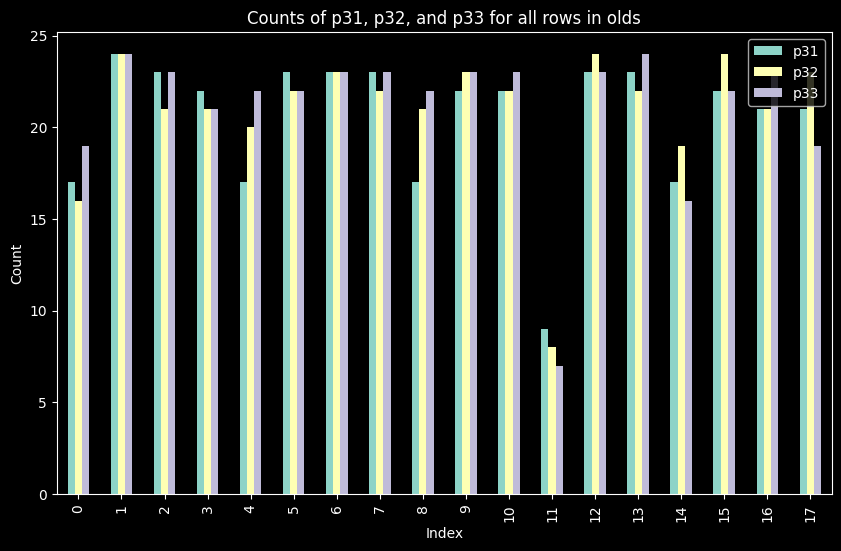

In [ ]:
# Plot the counts for p31, p32, and p33
olds[['p31', 'p32', 'p33']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Counts of p31, p32, and p33 for all rows in olds')
plt.legend(['p31', 'p32', 'p33'])
plt.show()

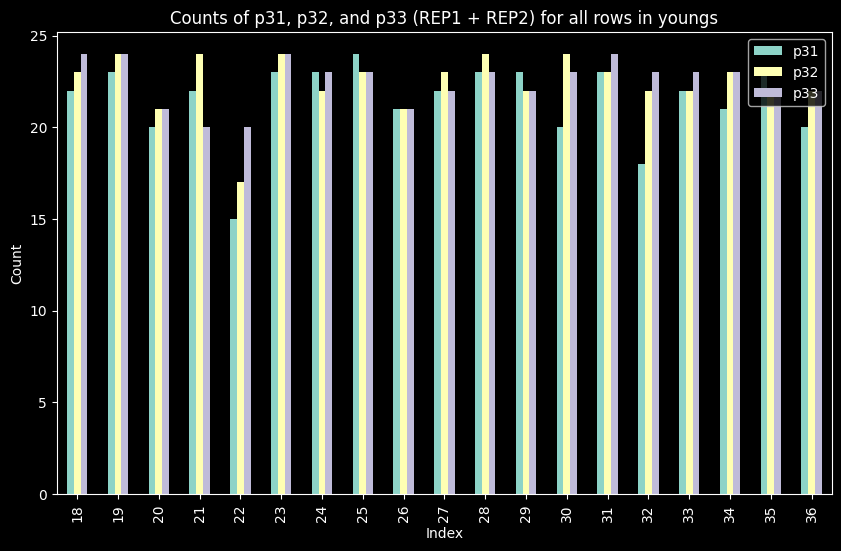

In [69]:
# Plot the counts for p31, p32, and p33
youngs[['p31', 'p32', 'p33']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Counts of p31, p32, and p33 (REP1 + REP2) for all rows in youngs')
plt.legend(['p31', 'p32', 'p33'])
plt.show()

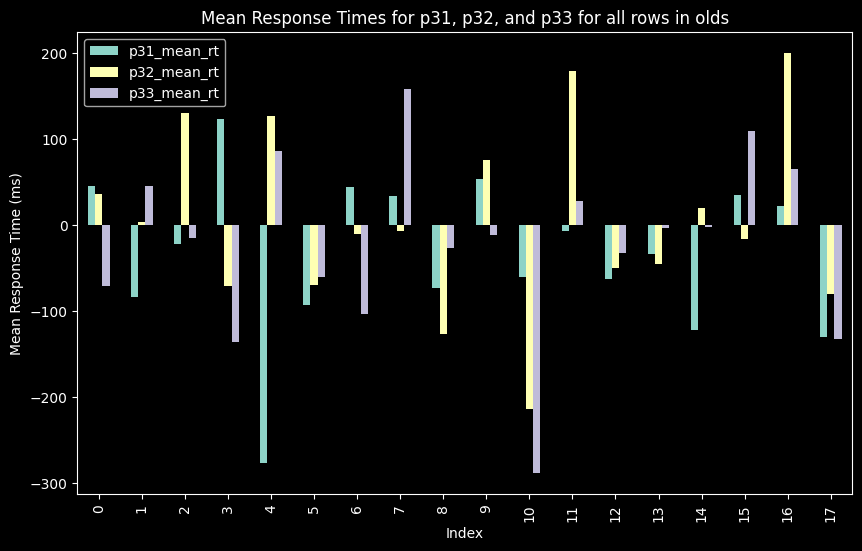

In [68]:
# Plot the mean response times for p31, p32, and p33
olds[['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times for p31, p32, and p33 for all rows in olds')
plt.legend(['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt'])
plt.show()

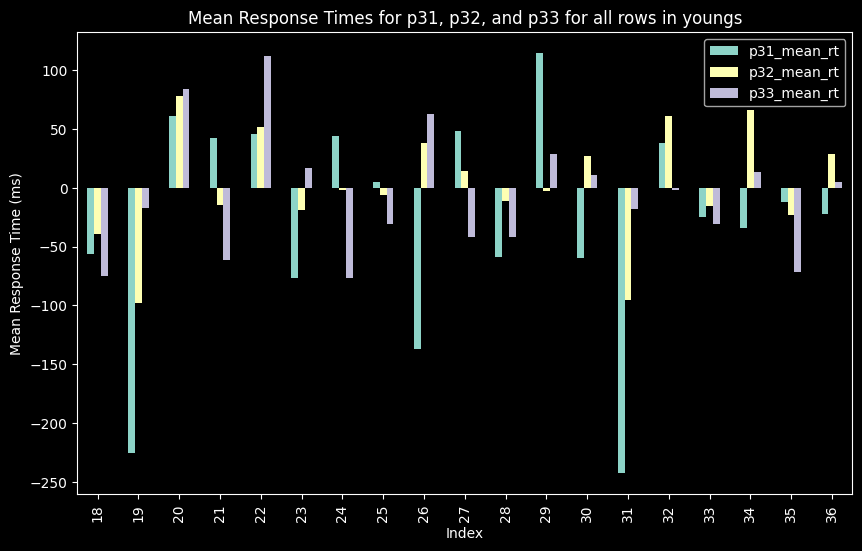

In [70]:
# Plot the mean response times for p31, p32, and p33
youngs[['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times for p31, p32, and p33 for all rows in youngs')
plt.legend(['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt'])
plt.show()

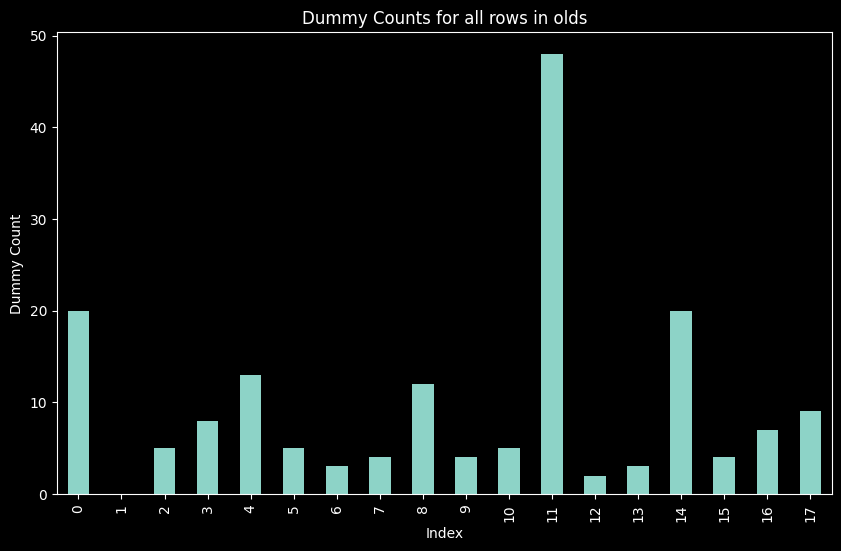

In [101]:
# Plot the dummy counts for olds
olds['dummy_p3_'].astype(int).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Dummy Count')
plt.title('Dummy Counts for all rows in olds')
plt.show()

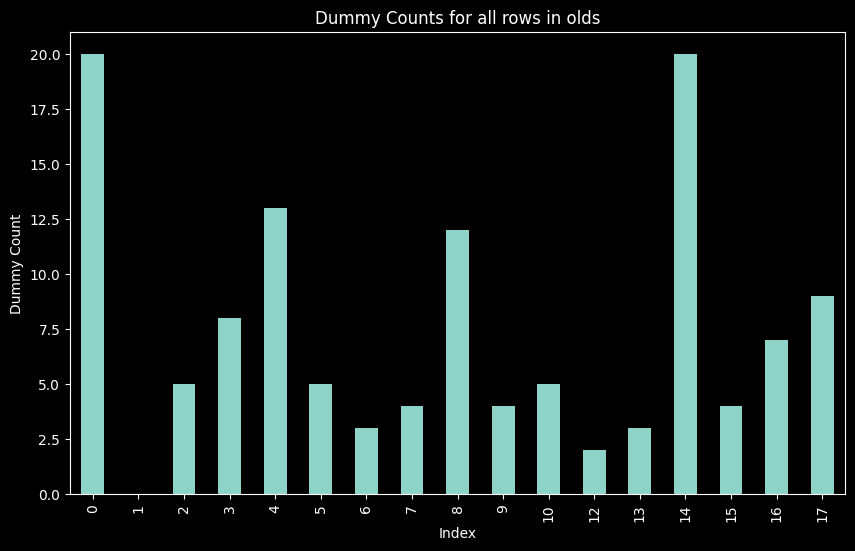

In [102]:
# Plot the dummy counts for olds
olds_filtered['dummy_p3_'].astype(int).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Dummy Count')
plt.title('Dummy Counts for all rows in olds')
plt.show()

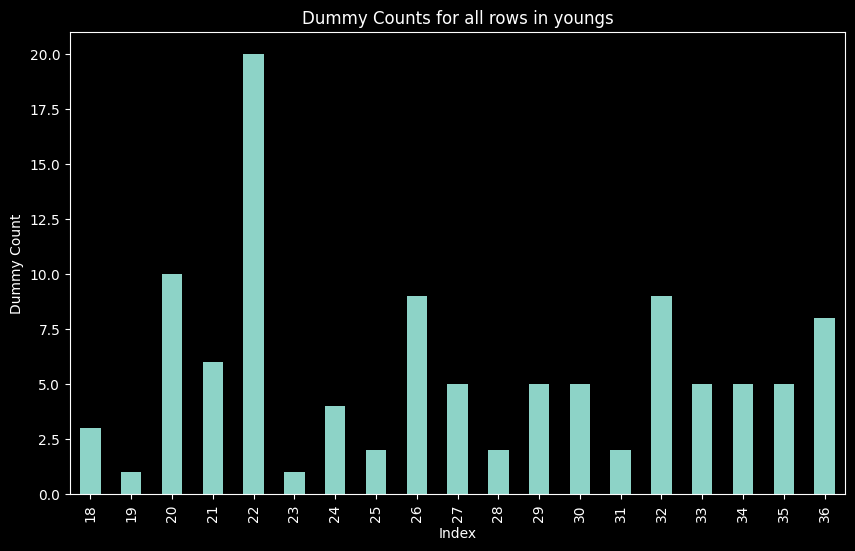

In [72]:
# Plot the dummy counts for olds
youngs['dummy_p3_'].astype(int).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Dummy Count')
plt.title('Dummy Counts for all rows in youngs')
plt.show()

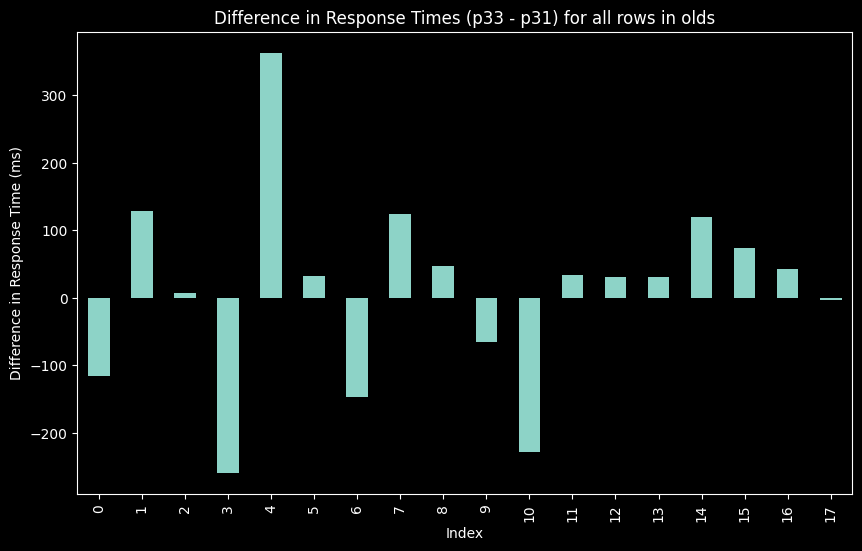

In [79]:
# Plot the p33_p31_diff for olds
olds['p33_p31_diff'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Difference in Response Time (ms)')
plt.title('Difference in Response Times (p33 - p31) for all rows in olds')
plt.show()

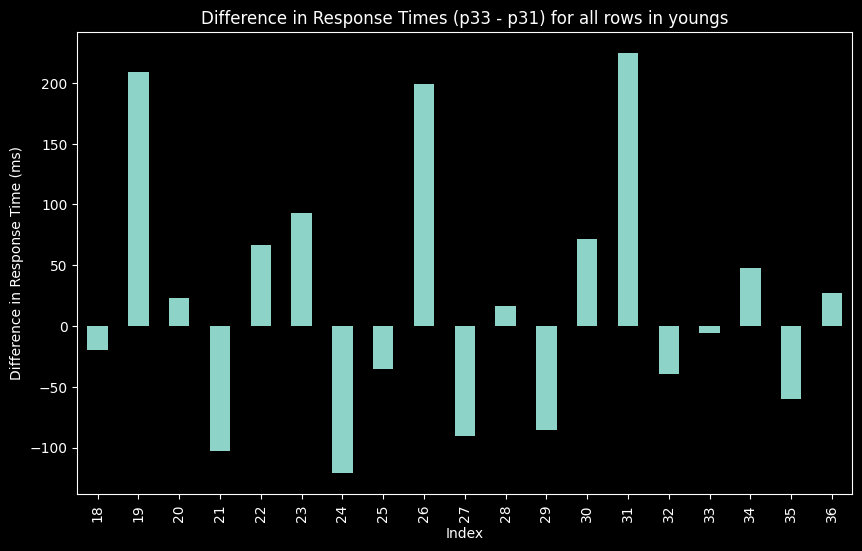

In [80]:
# Plot the p33_p31_diff for olds
youngs['p33_p31_diff'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Difference in Response Time (ms)')
plt.title('Difference in Response Times (p33 - p31) for all rows in youngs')
plt.show()

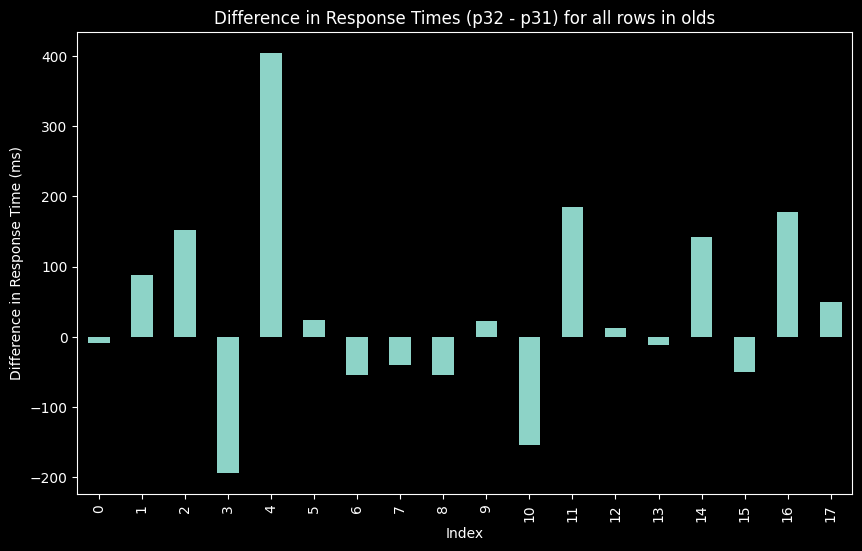

In [81]:
# Plot the p33_p31_diff for olds
olds['p32_p31_diff'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Difference in Response Time (ms)')
plt.title('Difference in Response Times (p32 - p31) for all rows in olds')
plt.show()

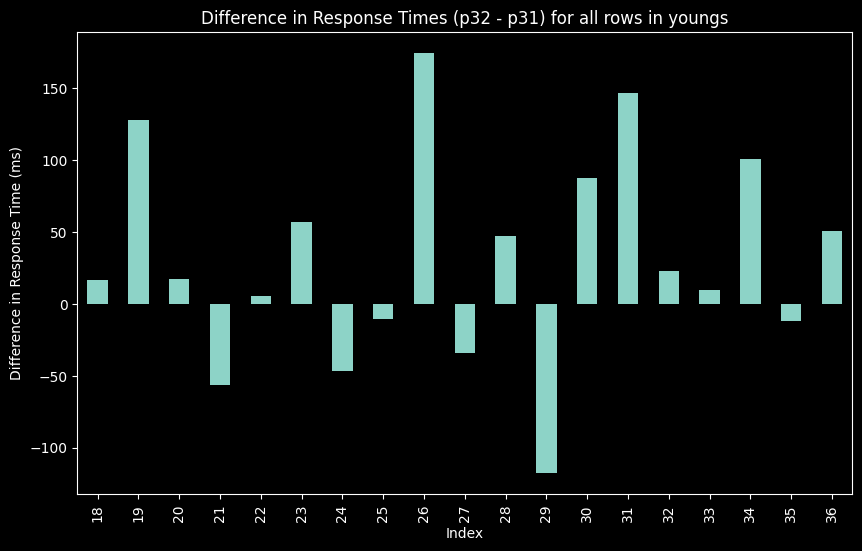

In [82]:
# Plot the p33_p31_diff for olds
youngs['p32_p31_diff'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Difference in Response Time (ms)')
plt.title('Difference in Response Times (p32 - p31) for all rows in youngs')
plt.show()

In [83]:
subject_stats_df

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc,p33_p31_diff,p32_p31_diff,p33_p32_diff
0,o01,17,16,19,44.928571,35.380952,-71.355556,66.857174,10.631648,0.715102,20,NaN,NaN,0,0,-116.284127,-9.547619,-106.736508
1,o02,24,24,24,-83.500000,3.750000,44.666667,12.422876,-24.979282,-2.218431,0,NaN,NaN,0,0,128.166667,87.250000,40.916667
2,o03,23,21,23,-22.128788,129.666667,-14.727273,-77.949252,128.349108,54.174211,5,NaN,NaN,0,0,7.401515,151.795455,-144.393939
3,o04,22,21,21,122.583333,-71.590909,-136.583333,189.576505,-227.592514,-323.110670,8,NaN,NaN,0,0,-259.166667,-194.174242,-64.992424
4,o05,17,20,22,-277.028571,127.202020,85.466667,-117.148330,36.862880,99.212789,13,NaN,NaN,0,0,362.495238,404.230592,-41.735354
5,o06,23,22,22,-93.666667,-70.233333,-61.181818,0.066228,-115.386423,-91.418164,5,NaN,NaN,0,0,32.484848,23.433333,9.051515
6,o07,23,23,23,43.696970,-10.825758,-103.303030,45.579125,-36.833276,-54.505093,3,NaN,NaN,0,0,-147.000000,-54.522727,-92.477273
7,o08,23,22,23,33.348485,-7.616667,157.939394,247.953389,-106.707190,149.532472,4,NaN,NaN,0,0,124.590909,-40.965152,165.556061
8,o09,17,21,22,-73.060606,-127.427273,-26.454545,-83.113914,-430.750151,-11.536060,12,NaN,NaN,0,0,46.606061,-54.366667,100.972727
9,o10,22,23,23,53.666667,75.681818,-11.742424,-46.793786,189.711035,-133.400158,4,NaN,NaN,0,0,-65.409091,22.015152,-87.424242


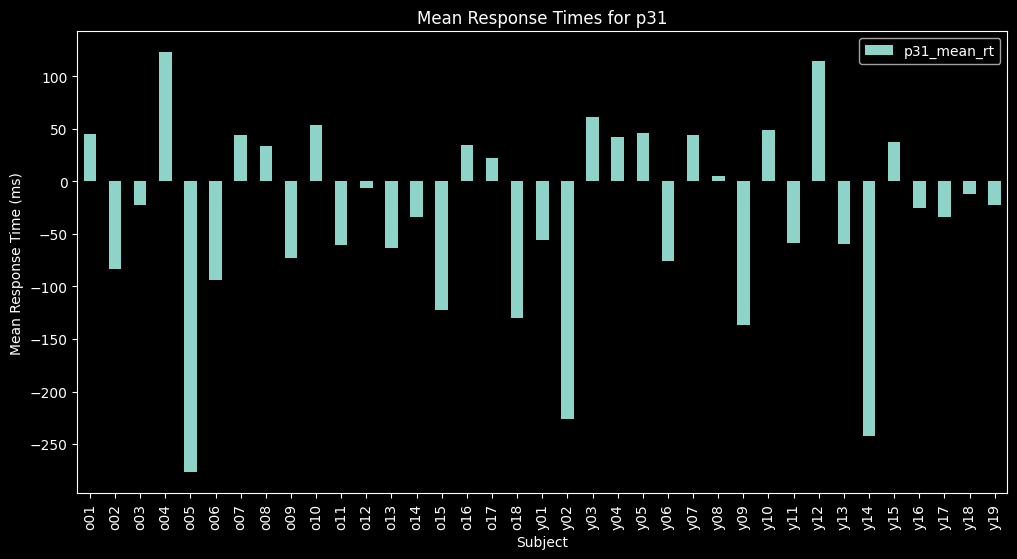

In [84]:
subject_stats_df[['subject', 'p31_mean_rt']].set_index('subject').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Subject')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times for p31')
plt.legend(['p31_mean_rt'])
plt.show()

In [85]:
rep_stats_df

,subject,rep,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc
0,o01,rep1,7,7,10,920.571429,803.285714,860.800000,140.580768,153.969385,158.489257,12,NaN,NaN,0,0
1,o01,rep2,10,9,9,965.500000,838.666667,789.444444,207.437943,164.601033,159.204359,8,965.500000,207.437943,0,0
0,o02,rep1,12,12,12,891.000000,644.750000,666.666667,137.895876,112.039867,98.721218,0,NaN,NaN,0,0
1,o02,rep2,12,12,12,807.500000,648.500000,711.333333,150.318752,87.060585,96.502787,0,807.500000,150.318752,0,0
0,o03,rep1,12,12,12,775.583333,667.000000,722.000000,182.404375,111.949664,107.331263,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,y17,rep2,10,12,12,721.400000,665.833333,635.916667,133.544999,103.270900,74.456160,2,721.400000,133.544999,0,0
0,y18,rep1,11,10,11,777.454545,660.600000,738.727273,198.030989,85.381757,168.161286,4,NaN,NaN,0,0
1,y18,rep2,12,12,11,765.833333,637.166667,667.272727,114.015018,102.322870,132.324670,1,765.833333,114.015018,0,0
0,y19,rep1,11,11,11,852.545455,664.272727,663.000000,196.760953,90.145539,72.908161,3,NaN,NaN,0,0


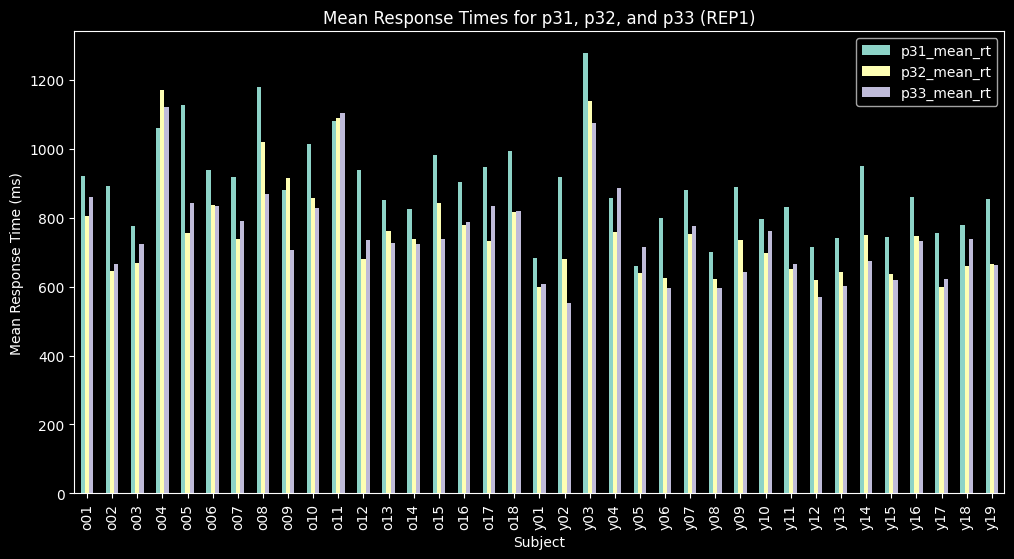

In [86]:
rep1_stats_df = rep_stats_df[rep_stats_df['rep'] == 'rep1']
rep1_stats_df[['subject', 'p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt']].set_index('subject').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Subject')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times for p31, p32, and p33 (REP1)')
plt.legend(['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt'])
plt.show()

In [106]:
rep1_stats_df = rep_stats_df[(rep_stats_df['rep'] == 'rep1') & (rep_stats_df['subject'].str.startswith('o'))]
mean_p31_rt = rep1_stats_df['p31_mean_rt'].mean()
mean_p32_rt = rep1_stats_df['p32_mean_rt'].mean()
mean_p33_rt = rep1_stats_df['p33_mean_rt'].mean()

print(f'Mean response time for p31 in REP1: {mean_p31_rt}')
print(f'Mean response time for p32 in REP1: {mean_p32_rt}')
print(f'Mean response time for p33 in REP1: {mean_p33_rt}')

overall_mean_rt = (mean_p31_rt + mean_p32_rt + mean_p33_rt) / 3
print(f'Overall mean response time for p31, p32, and p33 in REP1: {overall_mean_rt}')
#

Mean response time for p31 in REP1: 956.290263748597
Mean response time for p32 in REP1: 824.4577360910694
Mean response time for p33 in REP1: 816.5290404040403
Overall mean response time for p31, p32, and p33 in REP1: 865.7590134145689


In [109]:
rep1_stats_df = rep_stats_df[(rep_stats_df['rep'] == 'rep1') & (rep_stats_df['subject'].str.startswith('y'))]
y_mean_p31_rt = rep1_stats_df['p31_mean_rt'].mean()
y_mean_p32_rt = rep1_stats_df['p32_mean_rt'].mean()
y_mean_p33_rt = rep1_stats_df['p33_mean_rt'].mean()

print(f'Mean response time for p31 in REP1: {y_mean_p31_rt}')
print(f'Mean response time for p32 in REP1: {y_mean_p32_rt}')
print(f'Mean response time for p33 in REP1: {y_mean_p33_rt}')

y_overall_mean_rt = (y_mean_p31_rt + y_mean_p32_rt + y_mean_p33_rt) / 3
print(f'Overall mean response time for p31, p32, and p33 in REP1: {y_overall_mean_rt}')
#

Mean response time for p31 in REP1: 825.2732323232324
Mean response time for p32 in REP1: 695.086283891547
Mean response time for p33 in REP1: 688.9728867623603
Overall mean response time for p31, p32, and p33 in REP1: 736.4441343257132


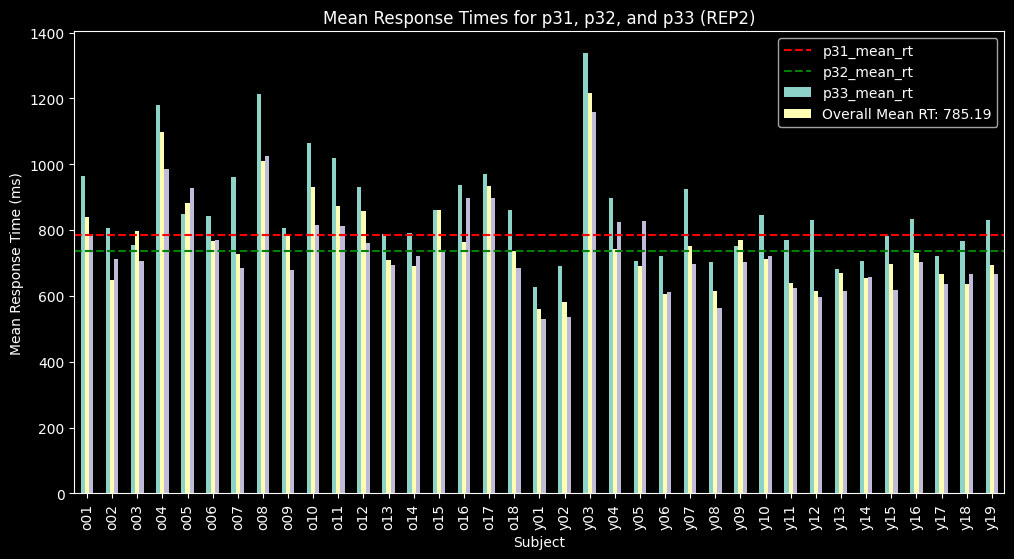

In [110]:
rep1_stats_df = rep_stats_df[rep_stats_df['rep'] == 'rep2']
rep1_stats_df[['subject', 'p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt']].set_index('subject').plot(kind='bar', figsize=(12, 6))
plt.axhline(y=overall_mean_rt, color='r', linestyle='--', label=f'Overall Mean RT old: {overall_mean_rt:.2f}')
plt.axhline(y=y_overall_mean_rt, color='g', linestyle='--', label=f'Overall Mean RT young: {y_overall_mean_rt:.2f}')
plt.xlabel('Subject')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times for p31, p32, and p33 (REP2)')
plt.legend(['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt', f'Overall Mean RT: {overall_mean_rt:.2f}'])
plt.show()

In [ ]:
# TODO: accuracy rate